CREAZIONE DATASET

In questo notebook lavoriamo sul dataset di copertine di libri scaricato da kaggle  (https://www.kaggle.com/lukaanicin/book-covers-dataset) e dividiamo questo dataset già diviso in una cartella per ogni categoria in due cartelle più piccole contenenti una il training test , con l'80% di copertine per il ogni genere, l'altra il validation set contenente il rimanente 20% delle immagini 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from progressbar import ProgressBar
import random
import cv2
import os
import sys

pbar= ProgressBar()

Colleghiamo il notebook al nostro google drive per permettergli accesso alla cartella book-covers con il dataset non lavorato 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Ci assicuriamo che il mounting sia avvenuto correttamente facendoci restituire i nomi delle cartelle al suo interno ai quali abbiamo aggiunto i valori dei loro indici alla fine del loro nome per facilità di categorizzazione

In [ ]:
!ls 'gdrive/MyDrive/ProgettoFIA/book-covers'

Art-Photography_0	       Natural-History_17
Biography_1		       Personal-Development_18
Business-Finance-Law_2	       Poetry-Drama_19
Childrens-Books_3	       Reference_20
Computing_4		       Religion_21
Crafts-Hobbies_5	       Romance_22
Crime-Thriller_6	       Science-Fiction-Fantasy-Horror_23
Dictionaries-Languages_7       Science-Geography_24
Entertainment_8		       Society-Social-Sciences_25
Food-Drink_9		       Sport_26
Graphic-Novels-Anime-Manga_10  Stationery_27
Health_11		       Teaching-Resources-Education_28
History-Archaeology_12	       Technology-Engineering_29
Home-Garden_13		       Teen-Young-Adult_30
Humour_14		       Transport_31
Medical_15		       Travel-Holiday-Guides_32
Mind-Body-Spirit_16


Dopo aver creato una cartella data, con al suo interno le cartelle train e test per poter salvare le immagini dei due set in due apposite cartelle, creiamo la variabile DATADIR con il path della cartella da cui prenderemo le immagini e le due variabili TargetDir in cui invece li salveremo.

In [ ]:
DATADIR = 'gdrive/MyDrive/ProgettoFIA/book-covers'
TargetDir1='gdrive/MyDrive/ProgettoFIA/data/train'
TargetDir2='gdrive/MyDrive/ProgettoFIA/data/test'
Categories = os.listdir(DATADIR)

Indichiamo di creare una cartella per ogni categoria all' interno di DATADIR anche nelle altre due cartelle

In [ ]:
for category in Categories:
  os.makedirs('gdrive/MyDrive/ProgettoFIA/data/train/' + category)
  os.makedirs('gdrive/MyDrive/ProgettoFIA/data/test/'+ category)

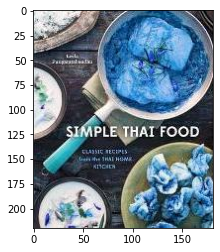

In [ ]:
for category in Categories:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,'0000988.jpg'))
      plt.imshow(img_array)
      plt.show()
      break
    break

In [ ]:
img_array.shape

(220, 182, 3)

Questa funzione non ci fa solamente il resizing di tutte le foto all' interno di una cartella di boock-covers ma ci fa già una divisione degli elementi al suo interno tra le cartelle della stessa categoria presenti in train e test

In [ ]:
from PIL import Image

def resize(source_dir,target_dir1,target_dir2,perc):
  files= os.listdir(source_dir)
  dim=len(files)
  dim1=int(perc*dim)
  i= source_dir.split('_')[1]
  for item in files[:dim1]:
      if os.path.isfile(os.path.join(source_dir,item)): 
          im = Image.open(os.path.join(source_dir,item))
          f, e = os.path.splitext(os.path.join(target_dir1,item))
          rgb_im=im.convert('RGB')
          imResize = rgb_im.resize((100,100), Image.ANTIALIAS)
          imResize.save(f + '_'+ str(i) +'.jpg', 'JPEG', quality=90)

  for item in files[dim1:]:
      if os.path.isfile(os.path.join(source_dir,item)): 
          im = Image.open(os.path.join(source_dir,item))
          f, e = os.path.splitext(os.path.join(target_dir2,item))
          rgb_im=im.convert('RGB')
          imResize = rgb_im.resize((100,100), Image.ANTIALIAS)
          imResize.save(f + '_'+ str(i) +'.jpg', 'JPEG', quality=90)


In [ ]:
 for category in Categories:
  resize(os.path.join(DATADIR,category),
         os.path.join(TargetDir1,category),
         os.path.join(TargetDir2,category),0.8)